<a href="https://colab.research.google.com/github/ssjsmith750/salary_dataset_lnrRegression/blob/main/Salary_dataset_linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/Salary_dataset.csv")
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
data1=data.drop(['Unnamed: 0'],axis=1) # To drop unnecesary column

In [4]:
data1

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [5]:
data1.describe() # to find the summary

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [6]:
data1.YearsExperience.quantile(0.75)# check the 75th quantile

7.8

In [7]:
data1.YearsExperience.quantile(0.25)

3.3000000000000003

In [8]:
iqr = data1.YearsExperience.quantile(0.75) - data.YearsExperience.quantile(0.25)
iqr

4.5

In [9]:
upper_thershold = data1.YearsExperience.quantile(0.75) + (1.5*iqr) #q3
lower_thershold = data1.YearsExperience.quantile(0.25) - (1.5*iqr) #q1

upper_thershold,lower_thershold

(14.55, -3.4499999999999997)

NO outliers checking for null values

In [10]:
data1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

NO Null Values also Delete the duplicate values

In [11]:
data1 = data1.drop_duplicates()
data1.shape # used to delete the duplicate values

(30, 2)

# **#ETA**

In [12]:
data1.dtypes

YearsExperience    float64
Salary             float64
dtype: object

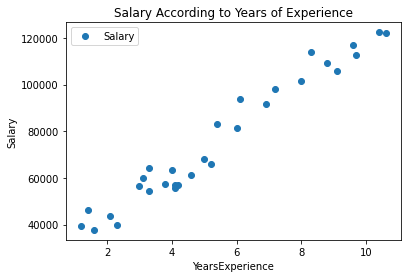

In [13]:
data1.plot(x='YearsExperience',y = 'Salary', style='o')
plt.title('Salary According to Years of Experience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

There is a relationship Btw the Feature and Target also linear relationship can be seen

In [14]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


There is a linear relationship between YearsExperience and Salary

In [15]:
data.Salary.values

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

preparing the data 

In [16]:
X = data1.loc[:, ['YearsExperience']].values # select all rows and columns
y = data1.loc[:, ['Salary']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state= 8)

In [32]:
y_test

array([[105583.],
       [ 39344.],
       [ 54446.],
       [ 81364.],
       [ 67939.],
       [ 39892.],
       [121873.],
       [ 46206.]])

In [18]:
X_train.shape, X_test.shape

((22, 1), (8, 1))

In [19]:
X_test

array([[ 9.1],
       [ 1.2],
       [ 3.3],
       [ 6. ],
       [ 5. ],
       [ 2.3],
       [10.6],
       [ 1.4]])

# **Modelling**

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # predicted scores = m* YearsExperience + c
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print(regressor.intercept_) # c

[23185.78510289]


In [22]:
print(regressor.coef_) # slope - m

[[9824.98564969]]


In [23]:
regressor .predict([[9]])

array([[111610.65595008]])

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([[112593.15451505],
       [ 34975.76788251],
       [ 55608.23774686],
       [ 82135.69900102],
       [ 72310.71335133],
       [ 45783.25209717],
       [127330.63298958],
       [ 36940.76501245]])

In [38]:
df = pd.DataFrame([{'Actual': y_test, 'Predicted': y_pred}],index=[1])
df

,Actual,Predicted
1,"[[105583.0], [39344.0], [54446.0], [81364.0], ...","[[112593.15451504805], [34975.76788251415], [5..."


In [41]:
regressor.predict([[12]])

array([[141085.61289914]])

In [42]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) 

R2- SCORE: 0.9644656253169838


0.9644656253169838